# Tarea 2 (fecha de entrega: 23 de Julio 2023, 23:59)
Esta tarea consiste en 8 preguntas con un puntaje total de 7 pts. La nota será el maximo entre el puntaje obtenido mas el punto base y 7:

$$nota=\max(7, puntaje+1)$$

Se espera el codigo asociado a la respuesta y comentarios que hagan comprensible la lectura de la solución. Puede entregar la tarea en el formato que estime conveniente (doc, pdf, script de R, url de Kaggle) pero tenga en cuenta que debe adjuntar el código utilizado. Se recomienda el uso de Kaggle (recordar dejar el notebook compartido con el ayudante para que este pueda abrirlo).

# Rpostgres setup

Para iniciar el servidor virtual, instalar la base de datos postgres, y descargar los datos e importarlos, debe correr los siguientes bloques.

In [2]:
install.packages("RPostgres")
library("DBI")
library("RPostgres")


In [13]:
system("sudo apt install -y postgresql postgresql-contrib &>log", intern=T)
system("service postgresql start", intern = T)
system("sudo -u postgres psql -c \"CREATE USER root WITH SUPERUSER\"", intern=T)
system("sudo -u postgres createdb sakila", intern=T)
system("wget https://raw.githubusercontent.com/jOOQ/sakila/main/postgres-sakila-db/postgres-sakila-schema.sql", intern=T)
system("wget https://github.com/jOOQ/sakila/raw/main/postgres-sakila-db/postgres-sakila-insert-data.sql", intern=T)
system("psql sakila < /kaggle/working/postgres-sakila-schema.sql",intern=T)
system("psql sakila < /kaggle/working/postgres-sakila-insert-data.sql",intern=T)

[1] "CREATE ROLE"

In [ ]:
library(tidyverse)
theme_set(theme_grey(base_size = 20)) 
options(repr.plot.width=15, repr.plot.height=15)

# Connect

In [23]:
con <- dbConnect(RPostgres::Postgres(),dbname = 'sakila', user="root", password = 'PASSWORD')


In [24]:
dbListTables(con) #lista de tablas

[1] "address"                    "city"                      
 [3] "film_actor"                 "actor"                     
 [5] "film_category"              "inventory"                 
 [7] "actor_info"                 "category"                  
 [9] "country"                    "customer"                  
[11] "customer_list"              "film_list"                 
[13] "language"                   "rental"                    
[15] "payment_p2007_06"           "nicer_but_slower_film_list"
[17] "film"                       "payment_p2007_04"          
[19] "payment_p2007_02"           "payment_p2007_03"          
[21] "payment_p2007_05"           "staff"                     
[23] "sales_by_film_category"     "payment_p2007_01"          
[25] "payment"                    "sales_by_store"            
[27] "staff_list"                 "store"

A continuación se muestra un modelo E/R simplificado (sin atributos ni multiplicidades) para ilustrar las tablas y las relaciones entre ellas.

Importante: Note que una relación (rombo) no necesariamente significa que corresponda a una tabla en la base de datos (la relación puede estar dada por algún(os) atributo(s) de una de las dos entidades).


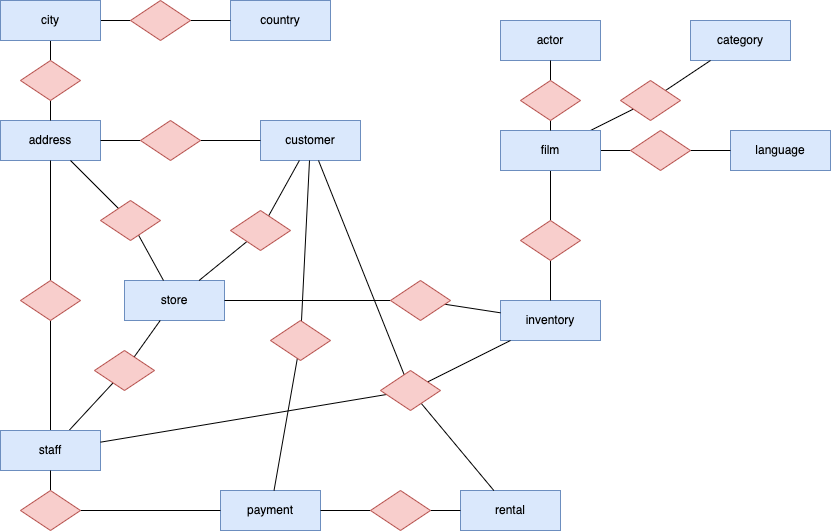

![sakila](https://codeandwork.github.io/courses/java/media/dbschema5.png)

Para explorar exactamente los atributos y las conexiones con otras tablas pueden ejecutar el comando ```\d [nombre_tabla]```. Por ejemplo:

In [ ]:
print(system("psql sakila -c '\\d film'", intern=T))

 [1] "                                                Table \"public.film\""                                                                                                     

 [2] "        Column        |            Type             | Collation | Nullable |                Default                "                                                       

 [3] "----------------------+-----------------------------+-----------+----------+---------------------------------------"                                                       

 [4] " film_id              | integer                     |           | not null | nextval('film_film_id_seq'::regclass)"                                                        

 [5] " title                | character varying(255)      |           | not null | "                                                                                             

 [6] " description          | text                        |           |          | "                     

# Pregunta 1 (0.5 pts)
Averigue cuáles actores tienen como primer nombre 'Scarlett'SCARLETT

# Pregunta 2 (0.5 pts)
¿Cuántas peliculas existen en la base de datos?

# Pregurnta 3 (1 pt)
a) (0.5 pts) Muestre la cantidad de películas por categoría 

b) (0.5 pts) Muestre estos resultados en un grafico de barras, ordenados segun id de categoria 

# Pregunta 4 (0.8 pts)
Muestre cuál es la categoría de peliculas más popular. Es decir, la categoria de peliculas que más se renta.

# Pregunta 5 (1 pt)
a) (0.4 pts) Calcule la cantidad de arriendos hechos por clientes que viven en 'Chile' 

b) (0.4 pts) Calcule la cantidad de arriendos de personas que viven en 'Chile' pero agrupados por ciudad.


b) (0.2 pts) Realice un grafico de torta con el resultado de la consulta anterior. Para ello utilicen el comando siguiente

```
ggplot(data, aes(x="", y=count, fill=city)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)
```
donde data es un dataframe con las columnas: 
- city: el nombre de la ciudad 
- count: el numero de arriendos por ciudad




# Pregunta 6 (1 pts)
a) (0.5 pts) Calcule los ingresos diarios por ciudad.

b) (0.3 pts) Obtenga los ingresos por dia de Woodridge entre los dias '2005-05-24' y '2005-06-1'

c) (0.2 pts) Haga un grafico de linea para loslos ingresos por dia de Woodridge entre los dias '2005-05-24' y '2005-06-1'

hint: use `geom_line`





# Pregunta 7 (1.7 pts)
Se define que una película es ''larga'' si es que es mayor que la duración promedio.
Una categoría de película es ''larga'' si es que el promedio de dureción de películas con esa categoría es mayor al promedio de duración de todas las películas.

a) (0.2 pts) Obtenga la duracion promedio de todas las peliculas de la base de datos.

b) (0.4 pts) Obtenga todas las peliculas ''largas''.

c) (0.4 pts) Obtenga la duracion promedio de las peliculas agrupando por categoria.

d) (0.4 pts) Obtenga las peliculas "largas" pero agrupando por categoría. En otras palabras, las peliculas cuya duración sea mayor a la duracion promedio por categoría.  

e) (0.3 pts) Realice 2 histogramas, uno para el largo de las peliculas y otro para la duración promedio por categoría (la respuesta de la pregunta c).

hint: use `geom_histogram(binwidth=5)` con `aes(x=length)`, donde binwidth es el ancho de las barras en el histograma

# Pregunta 8 (0.5 pts) 
Consulte si es que la película 'Academy Dinosaur' esta disponible para arrender de la tienda con id 1.